In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sairathanmaheshwaram","key":"e8f786a7ec7c72dcbbb259eb00bc5fa7"}'}

In [2]:
!pip install kaggle

In [3]:
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# ! kaggle competitions download <name-of-competition>
!kaggle datasets download advaitnmenon/network-traffic-data-malicious-activity-detection

Dataset URL: https://www.kaggle.com/datasets/advaitnmenon/network-traffic-data-malicious-activity-detection
License(s): unknown
 52% 7.00M/13.6M [00:00<00:00, 65.5MB/s]
100% 13.6M/13.6M [00:00<00:00, 72.0MB/s]


In [5]:
!unzip /content/network-traffic-data-malicious-activity-detection.zip
!rm -rf /content/network-traffic-data-malicious-activity-detection.zip

Archive:  /content/network-traffic-data-malicious-activity-detection.zip
  inflating: NandakumarMenonAdvait_MT_S2.csv  


In [6]:
!mv /content/NandakumarMenonAdvait_MT_S2.csv /content/data.csv

In [7]:
!pip install scikit-plot scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/data.csv')
data.head()

,Time,Source,Destination,Protocol,Length,Source Port,Destination Port,bad_packet
0,0.000000,VMware_8a:60:5f,Broadcast,ARP,60,NaN,NaN,0
1,0.081233,VMware_8a:12:84,Broadcast,ARP,60,NaN,NaN,0
2,0.217863,VMware_8a:7e:e9,Broadcast,ARP,60,NaN,NaN,0
3,0.419426,VMware_8a:b2:34,Broadcast,ARP,60,NaN,NaN,0
4,0.559886,VMware_8a:4e:1c,Broadcast,ARP,60,NaN,NaN,0


In [2]:
data.shape

(3245180, 8)

In [3]:
data.columns

Index(['Time', 'Source', 'Destination', 'Protocol', 'Length', 'Source Port',
       'Destination Port', 'bad_packet'],
      dtype='object')

In [4]:
data['bad_packet'].value_counts()

,count
bad_packet,
1,3240656
0,4524


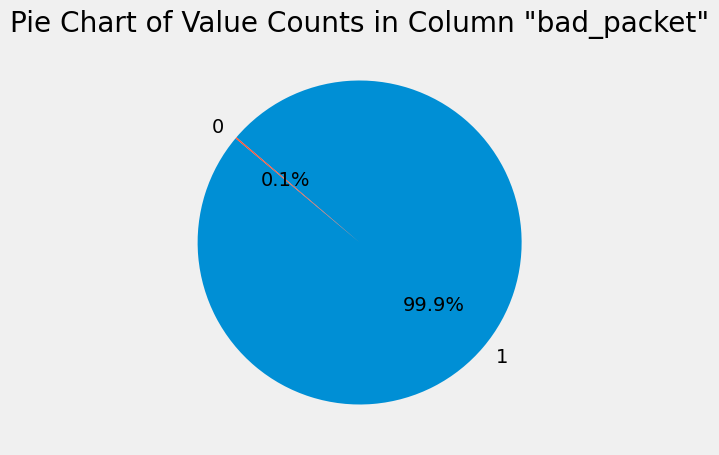

In [5]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

label_col_name = 'bad_packet'
value_counts = data[label_col_name].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Value Counts in Column \"{label_col_name}\"')
plt.grid()
plt.show()

In [6]:
th = 4500
data1 = data[data['bad_packet'] == 0].sample(th)
data2 = data[data['bad_packet'] == 1].sample(th)

data = pd.concat([data1,data2])
data.shape

(9000, 8)

In [7]:
data['bad_packet'].value_counts()

,count
bad_packet,
0,4500
1,4500


In [8]:
data.to_csv('threat_data.csv', index=False)

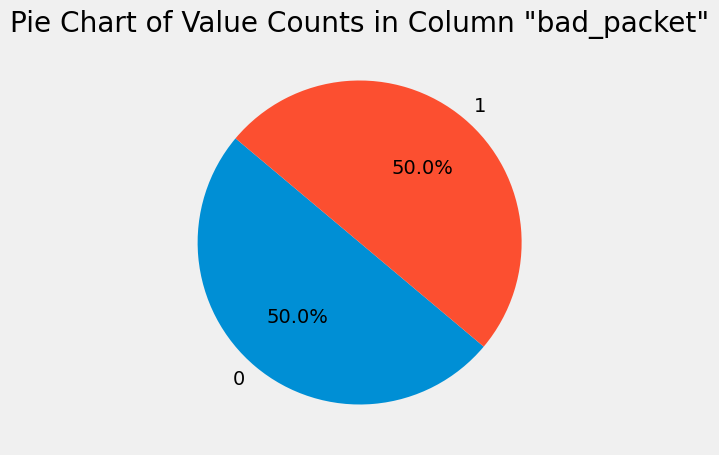

In [9]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

label_col_name = 'bad_packet'
value_counts = data[label_col_name].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Value Counts in Column \"{label_col_name}\"')
plt.grid()
plt.show()

In [10]:
data.dtypes

,0
Time,float64
Source,object
Destination,object
Protocol,object
Length,int64
Source Port,float64
Destination Port,float64
bad_packet,int64


In [11]:
data.isna().mean() * 100

,0
Time,0.000000
Source,0.000000
Destination,0.000000
Protocol,0.000000
Length,0.000000
Source Port,61.744444
Destination Port,61.744444
bad_packet,0.000000


In [12]:
data['Time'] = pd.to_datetime(data['Time'], unit='s', origin='unix')
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute
data['Second'] = data['Time'].dt.second
data['DayOfWeek'] = data['Time'].dt.dayofweek
data['Day'] = data['Time'].dt.day

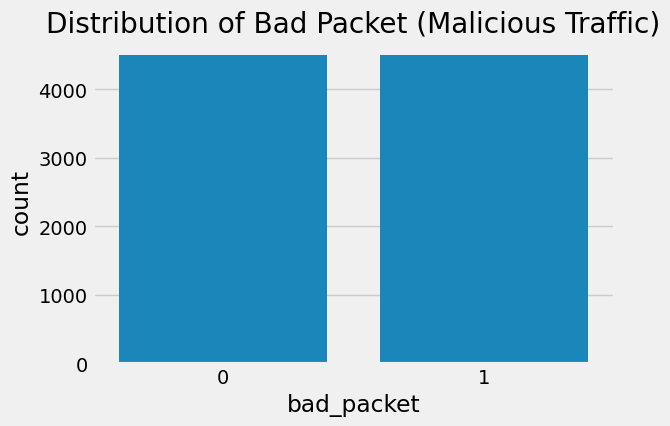

In [13]:
# Distribution of bad_packet
plt.figure(figsize=(6, 4))
sns.countplot(x='bad_packet', data=data)
plt.title('Distribution of Bad Packet (Malicious Traffic)')
plt.show()

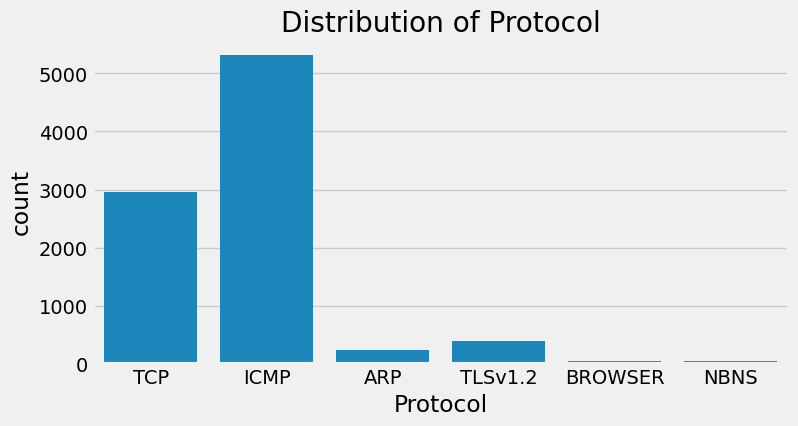

In [14]:
# Distribution of Protocol
plt.figure(figsize=(8, 4))
sns.countplot(x='Protocol', data=data)
plt.title('Distribution of Protocol')
plt.show()

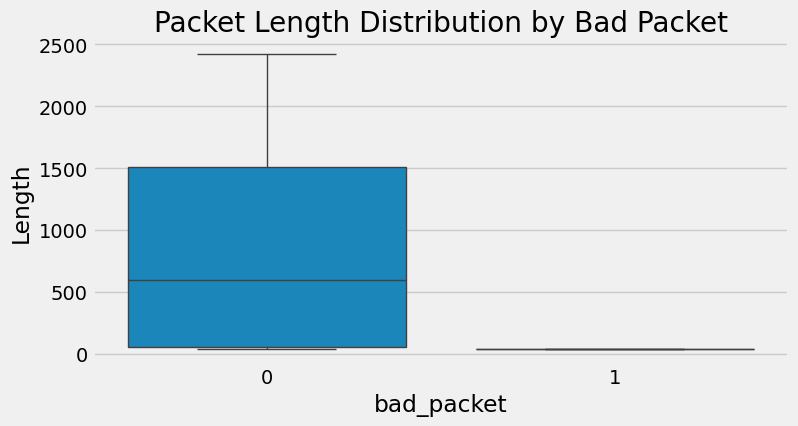

In [15]:
# Length distribution by bad_packet
plt.figure(figsize=(8, 4))
sns.boxplot(x='bad_packet', y='Length', data=data)
plt.title('Packet Length Distribution by Bad Packet')
plt.show()

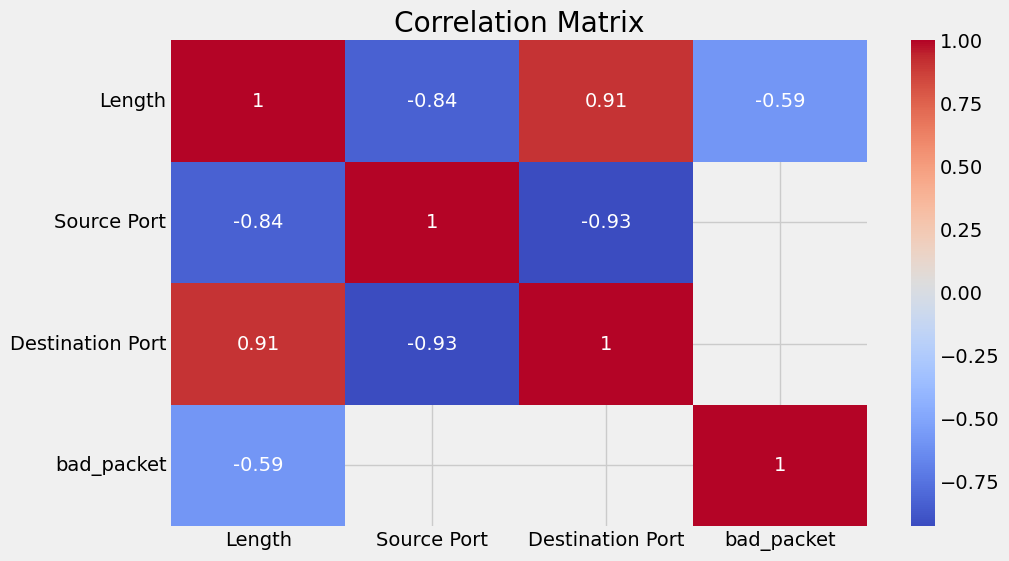

In [16]:
# Correlation matrix
corr_matrix = data[['Length', 'Source Port','Destination Port','bad_packet']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

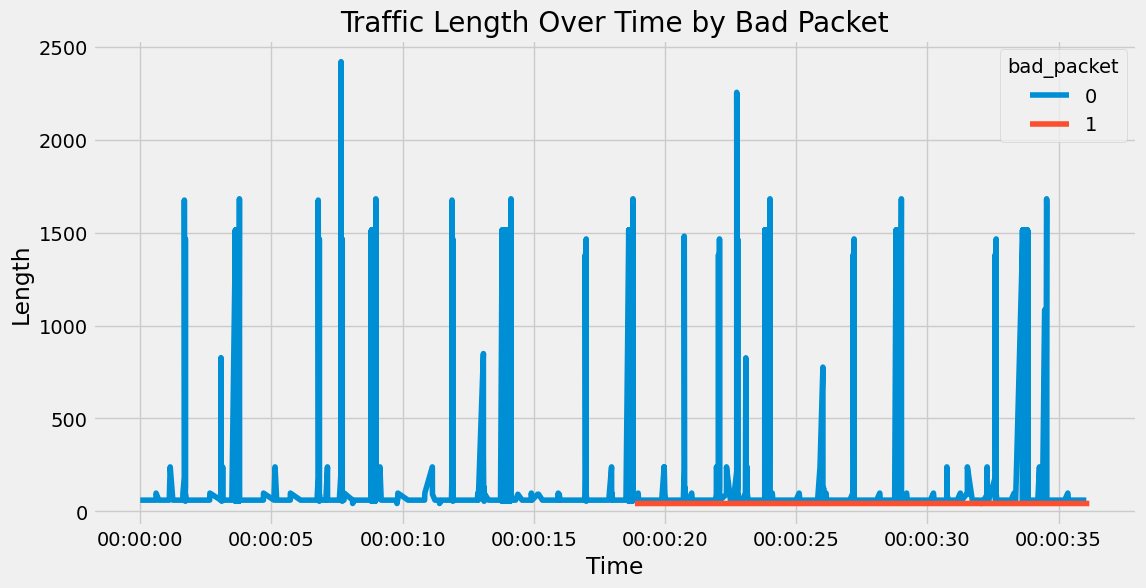

In [17]:
# Analysis of traffic over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Length', hue='bad_packet', data=data)
plt.title('Traffic Length Over Time by Bad Packet')
plt.show()


Top 10 Source IPs:
Source
192.167.5.35       5528
192.232.16.204     2222
192.167.5.22        783
142.251.32.14       128
VMware_8a:7e:e9      36
VMware_8a:31:5e      35
VMware_8a:60:5f      35
VMware_8a:b2:34      35
VMware_8a:12:84      34
VMware_8a:4e:1c      34
Name: count, dtype: int64

Top 10 Destination IPs:
Destination
192.167.5.22       4535
192.167.5.35       3133
192.232.16.204      924
Broadcast           231
192.167.255.255     100
142.251.32.14        69
VMware_8a:7f:3f       4
VMware_8a:aa:27       3
VMware_8a:5c:e6       1
Name: count, dtype: int64


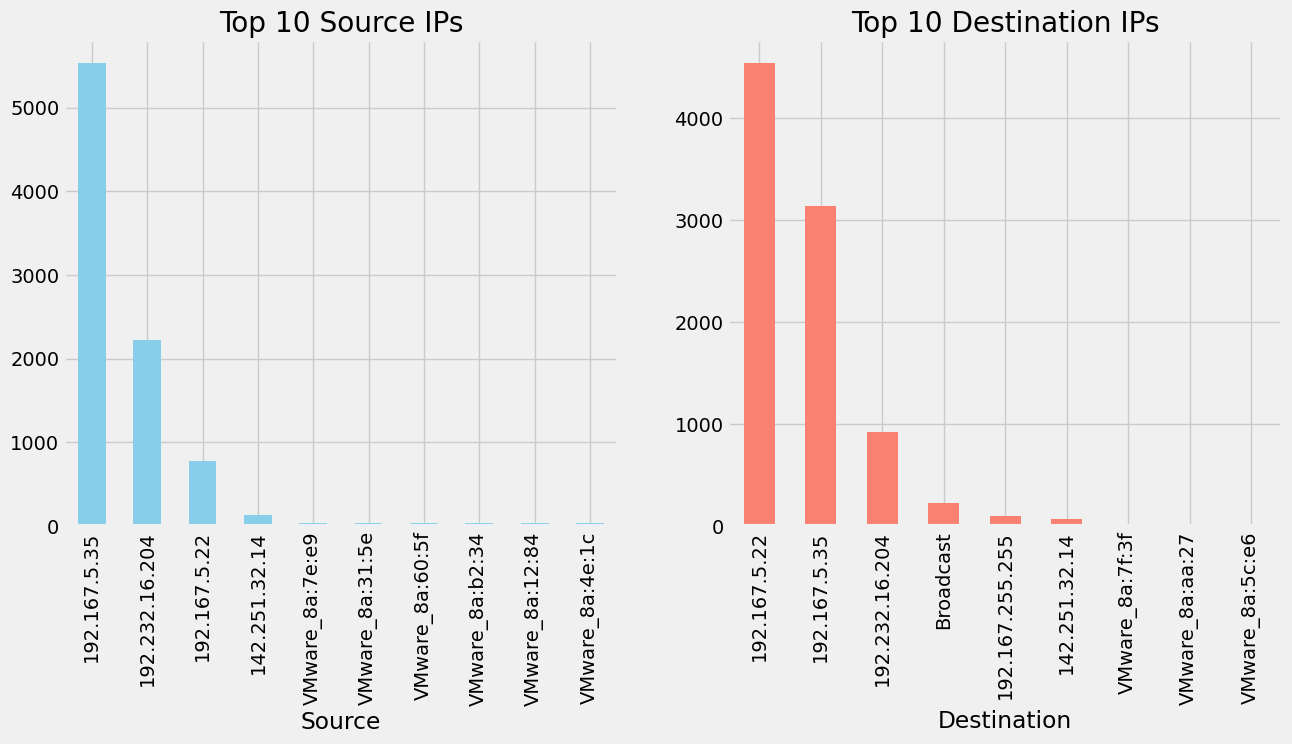

In [18]:
# Grouping by Source and Destination IP to find frequent sources/destinations
source_counts = data['Source'].value_counts().head(10)
destination_counts = data['Destination'].value_counts().head(10)

print("\nTop 10 Source IPs:")
print(source_counts)

print("\nTop 10 Destination IPs:")
print(destination_counts)

# Plot the top 10 sources and destinations
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
source_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Source IPs')

plt.subplot(1, 2, 2)
destination_counts.plot(kind='bar', color='salmon')
plt.title('Top 10 Destination IPs')
plt.show()


Insights for Protocol: TCP
Number of records: 2959
Number of bad packets: 0


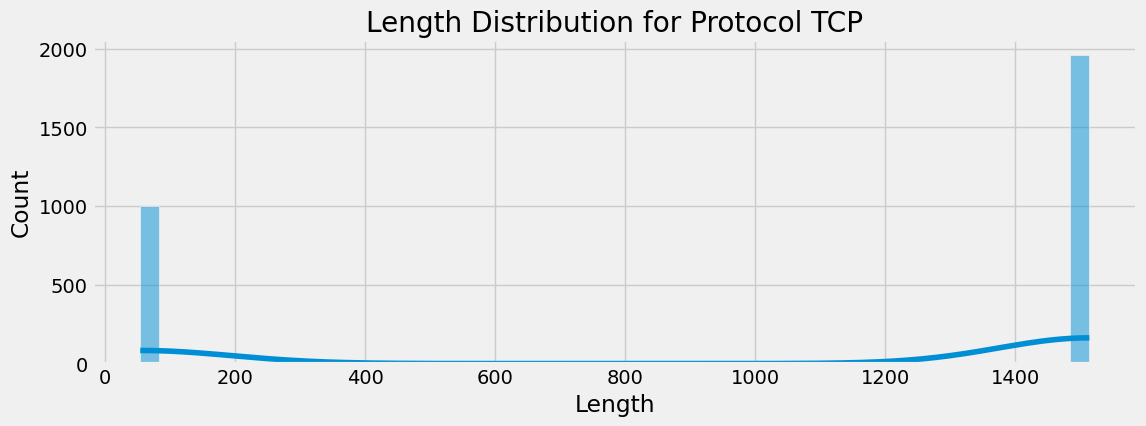


Insights for Protocol: ICMP
Number of records: 5318
Number of bad packets: 4500


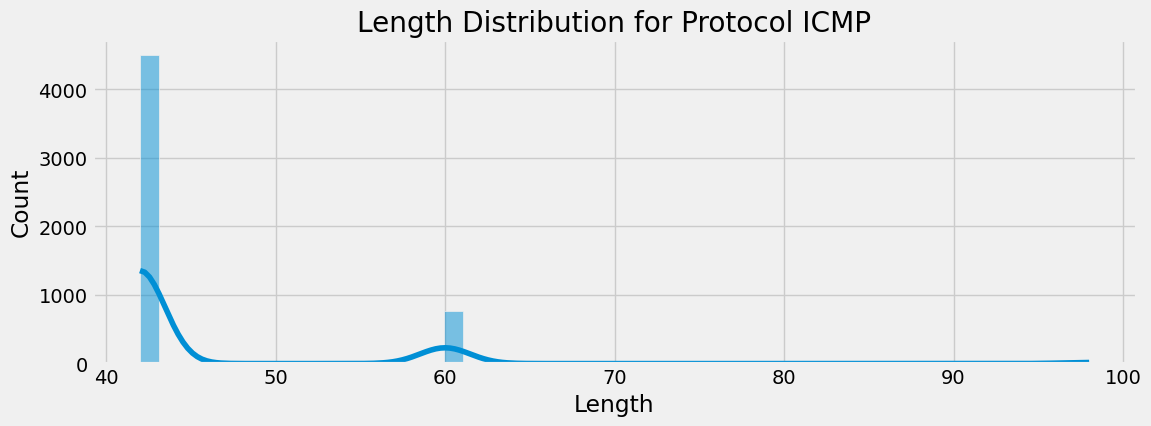


Insights for Protocol: ARP
Number of records: 239
Number of bad packets: 0


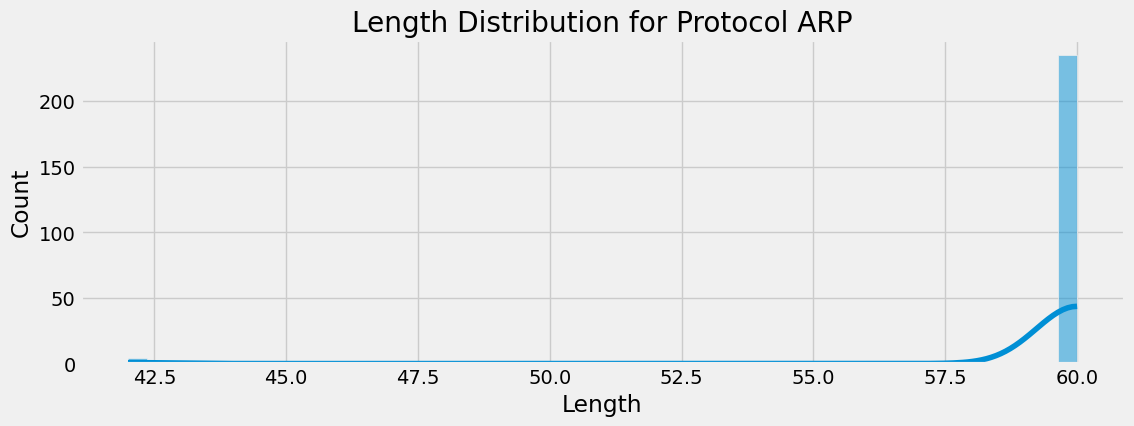


Insights for Protocol: TLSv1.2
Number of records: 384
Number of bad packets: 0


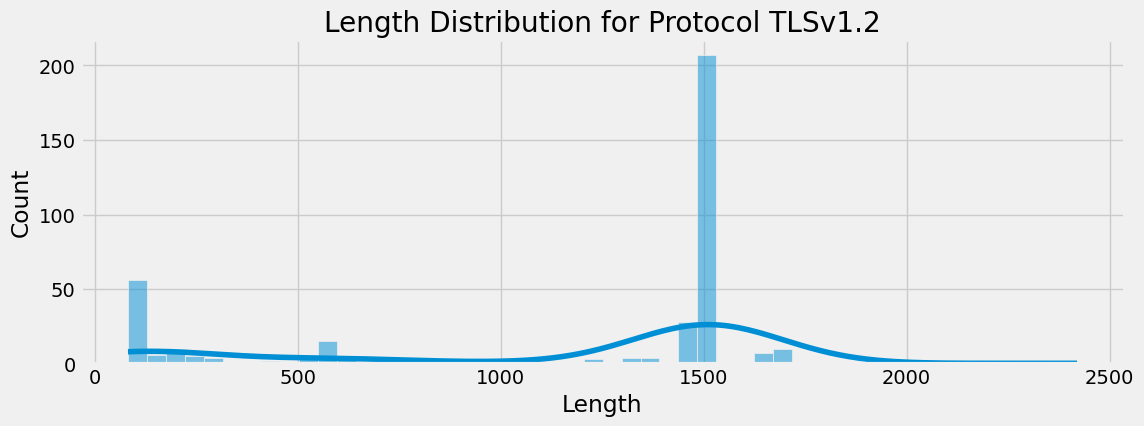


Insights for Protocol: BROWSER
Number of records: 47
Number of bad packets: 0


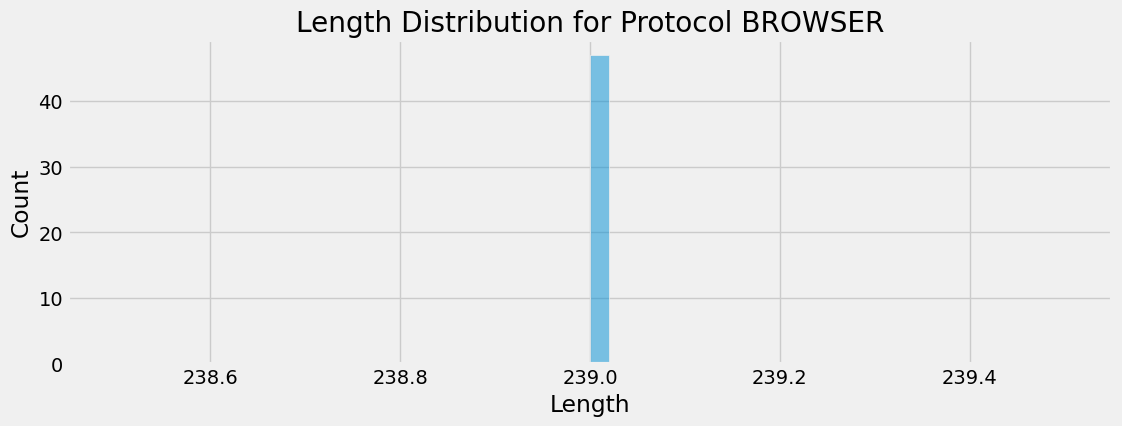


Insights for Protocol: NBNS
Number of records: 53
Number of bad packets: 0


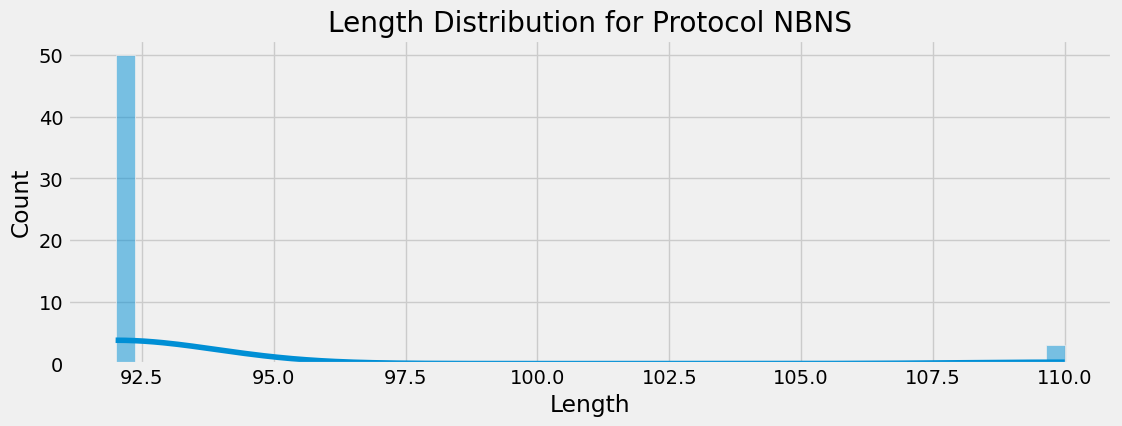

In [19]:
# Insights based on Protocol
for protocol in data['Protocol'].unique():
    protocol_data = data[data['Protocol'] == protocol]
    print(f"\nInsights for Protocol: {protocol}")
    print(f"Number of records: {len(protocol_data)}")
    print(f"Number of bad packets: {protocol_data['bad_packet'].sum()}")

    plt.figure(figsize=(12, 4))
    sns.histplot(protocol_data['Length'], bins=50, kde=True)
    plt.title(f'Length Distribution for Protocol {protocol}')
    plt.show()

In [20]:
# Convert Source and Destination IP addresses to numerical values using hashing
data['Source_IP_Hash'] = data['Source'].apply(lambda x: hash(x) % (2**16))
data['Destination_IP_Hash'] = data['Destination'].apply(lambda x: hash(x) % (2**16))

# If Source Port or Destination Port have NaN values, fill them with a placeholder (e.g., 0 or -1)
data['Source Port'] = data['Source Port'].fillna(-1).astype(int)
data['Destination Port'] = data['Destination Port'].fillna(-1).astype(int)

In [21]:
data.isna().sum()

,0
Time,0
Source,0
Destination,0
Protocol,0
Length,0
Source Port,0
Destination Port,0
bad_packet,0
Hour,0
Minute,0


In [22]:
# Calculate traffic volume: count of packets per second
data['Packets_per_Second'] = data.groupby('Second')['Length'].transform('count')

# Calculate rolling features (e.g., rolling mean and std for Length over the past 5 packets)
data['Rolling_Mean_Length'] = data['Length'].rolling(window=5).mean().fillna(data['Length'])
data['Rolling_Std_Length'] = data['Length'].rolling(window=5).std().fillna(0)

# Dropping original 'Time', 'Source', and 'Destination' columns as they've been transformed
data = data.drop(['Time', 'Source', 'Destination'], axis=1)

In [23]:
data.head()

,Protocol,Length,Source Port,Destination Port,bad_packet,Hour,Minute,Second,DayOfWeek,Day,Source_IP_Hash,Destination_IP_Hash,Packets_per_Second,Rolling_Mean_Length,Rolling_Std_Length
1840,TCP,54,57914,443,0,0,0,18,3,1,21101,53614,1199,54.0,0.000000
4320,ICMP,60,-1,-1,0,0,0,18,3,1,64293,21101,1199,60.0,0.000000
1329,TCP,54,57912,443,0,0,0,13,3,1,21101,53614,389,54.0,0.000000
1794024,TCP,54,57914,443,0,0,0,28,3,1,21101,53614,715,54.0,0.000000
259,TCP,54,57912,443,0,0,0,3,3,1,21101,53614,434,55.2,2.683282


In [24]:
data.columns

Index(['Protocol', 'Length', 'Source Port', 'Destination Port', 'bad_packet',
       'Hour', 'Minute', 'Second', 'DayOfWeek', 'Day', 'Source_IP_Hash',
       'Destination_IP_Hash', 'Packets_per_Second', 'Rolling_Mean_Length',
       'Rolling_Std_Length'],
      dtype='object')

In [25]:
data.dtypes

,0
Protocol,object
Length,int64
Source Port,int64
Destination Port,int64
bad_packet,int64
Hour,int32
Minute,int32
Second,int32
DayOfWeek,int32
Day,int32


In [26]:
X = data.drop(columns=['bad_packet'])
y = data[['bad_packet']]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [28]:
X_train.shape,X_test.shape

((7200, 14), (1800, 14))

In [29]:
y_train.shape,y_test.shape

((7200, 1), (1800, 1))

In [30]:
categorical_cols = ['Protocol']
numerical_cols = [i for i in data.columns if i not in categorical_cols + ['bad_packet']]
numerical_cols

['Length',
 'Source Port',
 'Destination Port',
 'Hour',
 'Minute',
 'Second',
 'DayOfWeek',
 'Day',
 'Source_IP_Hash',
 'Destination_IP_Hash',
 'Packets_per_Second',
 'Rolling_Mean_Length',
 'Rolling_Std_Length']

In [31]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

column_transformer = make_column_transformer(
    (StandardScaler(), numerical_cols),
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols),
)

X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

In [32]:
X_train.shape,X_test.shape

((7200, 19), (1800, 19))

In [33]:
label = y_test['bad_packet'].unique().tolist()
label

[0, 1]

In [34]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, log_loss, classification_report
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model, X_train, y_train, X_test, y_test, label, include_log_loss=True):
    print(f'Results for {model.__class__.__name__}:\n')

    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f'Training time (sec) = {train_time}')

    y_pred_train = model.predict(X_train)

    start_time = time.time()
    y_pred_test = model.predict(X_test)
    test_time = time.time() - start_time
    print(f'Prediction time (sec) = {test_time}')

    y_pred_prob_train = model.predict_proba(X_train) if hasattr(model, 'predict_proba') else None
    y_pred_prob_test = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    confusion_mat = confusion_matrix(y_test, y_pred_test)
    misclassified = np.sum(y_pred_test != y_test.values.ravel())
    acc_train = balanced_accuracy_score(y_train, y_pred_train)
    acc_test = balanced_accuracy_score(y_test, y_pred_test)

    loss_train, loss_test = None, None
    if include_log_loss and y_pred_prob_test is not None:
        loss_train = log_loss(y_train, y_pred_prob_train)
        loss_test = log_loss(y_test, y_pred_prob_test)

    print(f'\nTraining score = {acc_train}')
    print(f'Testing score = {acc_test}\n')

    for i, class_label in enumerate(label):
        err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
        print(f'No of misclassified for class {class_label} (test data) = {err}')

    print(f'Total no of misclassified points (test data) = {misclassified}')
    print(f'Total % of misclassified points (test data) = {misclassified / len(y_test)}\n')

    if loss_train is not None and loss_test is not None:
        print(f'Training log_loss = {loss_train}')
        print(f'Testing log_loss = {loss_test}\n')

    print('Confusion matrix:')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)
    plt.show()

    print('Classification report:\n')
    print(classification_report(y_test, y_pred_test))
    print('**************************************************************************')

    return [acc_train, acc_test, misclassified, misclassified / len(y_test), loss_train, loss_test, train_time, test_time]

Results for LogisticRegression:

Training time (sec) = 1.6376922130584717
Prediction time (sec) = 0.0006937980651855469

Training score = 0.9993055555555556
Testing score = 0.9988888888888889

No of misclassified for class 0 (test data) = 2
No of misclassified for class 1 (test data) = 0
Total no of misclassified points (test data) = 2
Total % of misclassified points (test data) = 0.0011111111111111111

Training log_loss = 0.002104791434640273
Testing log_loss = 0.0030614326280808063

Confusion matrix:


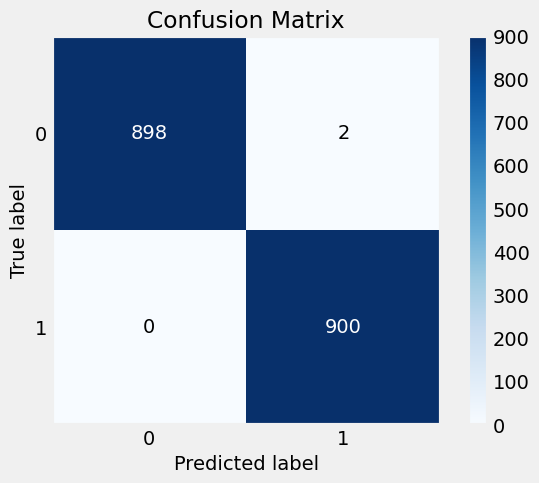

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      1.00      1.00       900

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

**************************************************************************


In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', n_jobs=-1)
LR_results = evaluate_model(lr, X_train, y_train, X_test, y_test, label)

Results for LinearSVC:

Training time (sec) = 0.015357255935668945
Prediction time (sec) = 0.0005257129669189453

Training score = 0.9998611111111111
Testing score = 0.9994444444444445

No of misclassified for class 0 (test data) = 1
No of misclassified for class 1 (test data) = 0
Total no of misclassified points (test data) = 1
Total % of misclassified points (test data) = 0.0005555555555555556

Confusion matrix:


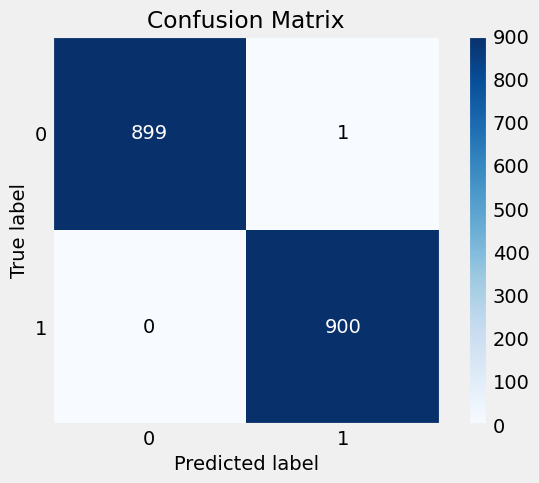

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      1.00      1.00       900

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

**************************************************************************


In [36]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight='balanced')
LSVC_results = evaluate_model(lsvc, X_train, y_train, X_test, y_test, label)

Results for DecisionTreeClassifier:

Training time (sec) = 0.012204170227050781
Prediction time (sec) = 0.0006923675537109375

Training score = 1.0
Testing score = 0.9994444444444445

No of misclassified for class 0 (test data) = 1
No of misclassified for class 1 (test data) = 0
Total no of misclassified points (test data) = 1
Total % of misclassified points (test data) = 0.0005555555555555556

Training log_loss = 2.2204460492503136e-16
Testing log_loss = 0.020024251882843083

Confusion matrix:


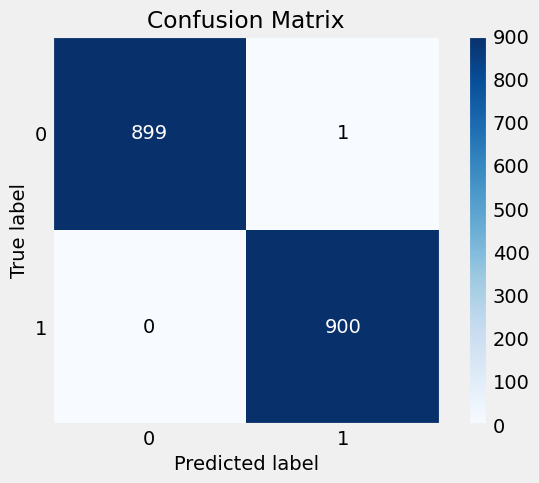

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      1.00      1.00       900

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

**************************************************************************


In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
DTC_results = evaluate_model(dtc, X_train, y_train, X_test, y_test, label)

Results for ExtraTreesClassifier:

Training time (sec) = 0.40079689025878906
Prediction time (sec) = 0.019910573959350586

Training score = 1.0
Testing score = 1.0

No of misclassified for class 0 (test data) = 0
No of misclassified for class 1 (test data) = 0
Total no of misclassified points (test data) = 0
Total % of misclassified points (test data) = 0.0

Training log_loss = 2.2204460492503136e-16
Testing log_loss = 0.0001561614716335208

Confusion matrix:


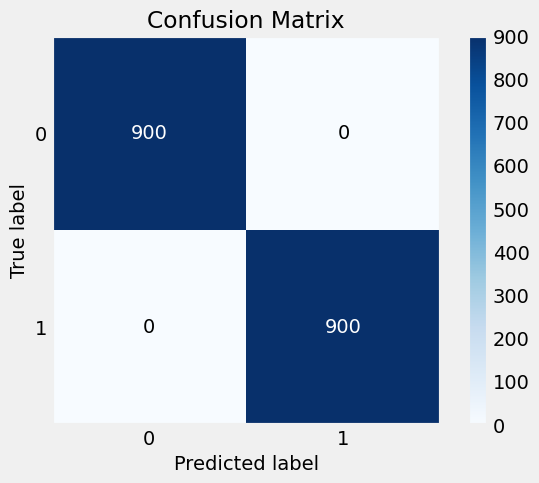

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      1.00      1.00       900

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

**************************************************************************


In [38]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(class_weight='balanced')
ETC_results = evaluate_model(etc, X_train, y_train, X_test, y_test, label)

Results for RandomForestClassifier:

Training time (sec) = 0.29257822036743164
Prediction time (sec) = 0.011340618133544922

Training score = 1.0
Testing score = 1.0

No of misclassified for class 0 (test data) = 0
No of misclassified for class 1 (test data) = 0
Total no of misclassified points (test data) = 0
Total % of misclassified points (test data) = 0.0

Training log_loss = 0.00011722035989683477
Testing log_loss = 0.00028205453853010295

Confusion matrix:


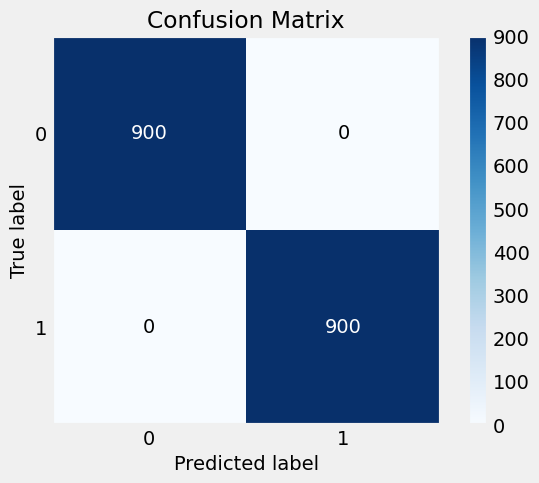

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      1.00      1.00       900

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

**************************************************************************


In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
RFC_results = evaluate_model(rfc, X_train, y_train, X_test, y_test, label)

In [40]:
# Set up directories for TensorBoard logs and model checkpoints
import os
from datetime import datetime

# Directory for TensorBoard logs
log_dir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))

# Directory to save the best model
checkpoint_dir = 'checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

# Define input shape based on your X_train
input_shape = (19,)

# Input layer
inputs = Input(shape=input_shape)

# Hidden layers (you can adjust the architecture)
x = Dense(64, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)

# Output layer (assuming binary classification)
outputs = Dense(1, activation='sigmoid')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 19)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Define callbacks
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'best_model.keras'),
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [43]:
# Start timer for training
start_train_time = time.time()
# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[checkpoint_callback, tensorboard_callback]
)
# End timer for training
end_train_time = time.time()
train_time = end_train_time - start_train_time

Epoch 1/50
160/180 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8113 - loss: 0.3682 - precision: 0.9307 - recall: 0.6329
Epoch 1: val_loss improved from inf to 0.01428, saving model to checkpoints/best_model.keras
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8260 - loss: 0.3443 - precision: 0.9377 - recall: 0.6620 - val_accuracy: 0.9944 - val_loss: 0.0143 - val_precision: 0.9888 - val_recall: 1.0000
Epoch 2/50
170/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9994 - loss: 0.0094 - precision: 0.9989 - recall: 0.9998
Epoch 2: val_loss improved from 0.01428 to 0.00434, saving model to checkpoints/best_model.keras
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9993 - loss: 0.0095 - precision: 0.9988 - recall: 0.9998 - val_accuracy: 0.9986 - val_loss: 0.0043 - val_precision: 0.9972 - val_recall: 1.0000
Epoch 3/50
172/180 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9995 - loss: 0.0047 - precision: 0.9991 - recall: 0.9998
Epoch 3: val_loss did not improve from 0.00

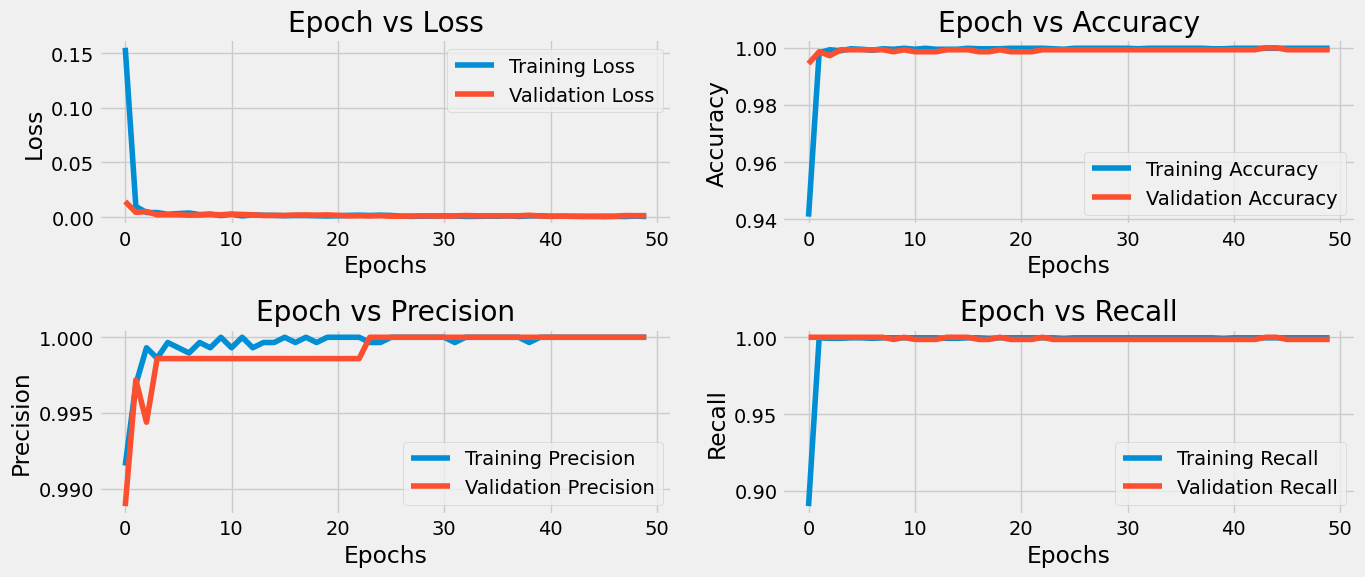

In [44]:
import matplotlib.pyplot as plt

# Extract metrics from the history object
history_dict = history.history

# Plot Training & Validation Loss
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(2, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Precision
plt.subplot(2, 2, 3)
plt.plot(history_dict['precision'], label='Training Precision')
plt.plot(history_dict['val_precision'], label='Validation Precision')
plt.title('Epoch vs Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Plot Training & Validation Recall
plt.subplot(2, 2, 4)
plt.plot(history_dict['recall'], label='Training Recall')
plt.plot(history_dict['val_recall'], label='Validation Recall')
plt.title('Epoch vs Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()


In [45]:
# Launch TensorBoard
# %load_ext tensorboard
# %tensorboard --logdir logs

In [46]:
# Start timer for evaluation
start_test_time = time.time()

# Evaluate the model on test data
test_loss, acc_test, precision, recall = model.evaluate(X_test, y_test, verbose=0)

# End timer for evaluation
end_test_time = time.time()
test_time = end_test_time - start_test_time

# Predictions and misclassification
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculate metrics
acc_train = history.history['accuracy'][-1]  # Last epoch training accuracy
loss_train = history.history['loss'][-1]     # Last epoch training loss

misclassified = sum(y_pred.flatten() != y_test.values.flatten())
misclassified_rate = misclassified / len(y_test)

# Collect results into a list
ANN_results = [
    acc_train,
    acc_test,
    misclassified,
    misclassified_rate,
    loss_train,
    test_loss,
    train_time,
    test_time
]

print(ANN_results)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[0.9998263716697693, 0.9994444251060486, 1, 0.0005555555555555556, 0.0005462202825583518, 0.0008993042865768075, 44.23421025276184, 0.4678537845611572]


In [47]:
s1=[LR_results,LSVC_results,DTC_results,ETC_results,RFC_results,ANN_results]
s2=['LR','LSVC','DTC','ETC','RFC','ANN']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,LR,0.999306,0.998889,2,0.001111,2.104791e-03,0.003061,1.637692,0.000694
1,LSVC,0.999861,0.999444,1,0.000556,NaN,NaN,0.015357,0.000526
2,DTC,1.000000,0.999444,1,0.000556,2.220446e-16,0.020024,0.012204,0.000692
3,ETC,1.000000,1.000000,0,0.000000,2.220446e-16,0.000156,0.400797,0.019911
4,RFC,1.000000,1.000000,0,0.000000,1.172204e-04,0.000282,0.292578,0.011341
5,ANN,0.999826,0.999444,1,0.000556,5.462203e-04,0.000899,44.234210,0.467854


In [48]:
column_transformer

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Length', 'Source Port', 'Destination Port',
                                  'Hour', 'Minute', 'Second', 'DayOfWeek',
                                  'Day', 'Source_IP_Hash',
                                  'Destination_IP_Hash', 'Packets_per_Second',
                                  'Rolling_Mean_Length',
                                  'Rolling_Std_Length']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Protocol'])])

In [49]:
etc

ExtraTreesClassifier(class_weight='balanced')

In [50]:
from sklearn.pipeline import make_pipeline
import joblib
pipeline = make_pipeline(column_transformer, lr)
joblib.dump(pipeline, 'etc_pipeline.joblib')

['etc_pipeline.joblib']

In [51]:
#tensorflow neural network
#ui with bulk upload and single point upload with prediction having confidence level

## web ui

In [52]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [53]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

ndr_attack_model_path = '/content/etc_pipeline.joblib'
ndr_attack_model_pipeline = joblib.load(ndr_attack_model_path)
class_dict = {0:'Safe',1:'Suspicious'}

# Function to read YAML file as a dictionary
def data_processing(data):
    data['Time'] = pd.to_datetime(data['Time'], unit='s', origin='unix')
    data['Hour'] = data['Time'].dt.hour
    data['Minute'] = data['Time'].dt.minute
    data['Second'] = data['Time'].dt.second
    data['DayOfWeek'] = data['Time'].dt.dayofweek
    data['Day'] = data['Time'].dt.day

    # Convert Source and Destination IP addresses to numerical values using hashing
    data['Source_IP_Hash'] = data['Source'].apply(lambda x: hash(x) % (2**16))
    data['Destination_IP_Hash'] = data['Destination'].apply(lambda x: hash(x) % (2**16))

    # If Source Port or Destination Port have NaN values, fill them with a placeholder (e.g., 0 or -1)
    data['Source Port'] = data['Source Port'].fillna(-1).astype(int)
    data['Destination Port'] = data['Destination Port'].fillna(-1).astype(int)

    # Calculate traffic volume: count of packets per second
    data['Packets_per_Second'] = data.groupby('Second')['Length'].transform('count')

    # Calculate rolling features (e.g., rolling mean and std for Length over the past 5 packets)
    data['Rolling_Mean_Length'] = data['Length'].rolling(window=5).mean().fillna(data['Length'])
    data['Rolling_Std_Length'] = data['Length'].rolling(window=5).std().fillna(0)

    # Dropping original 'Time', 'Source', and 'Destination' columns as they've been transformed
    data = data.drop(['Time', 'Source', 'Destination'], axis=1)
    return data

st.title("Network attack detection system")
sample_df = pd.read_csv("threat_data.csv")
time = st.number_input("Time", value=sample_df['Time'].min(), step=0.1, min_value=sample_df['Time'].min(), max_value=sample_df['Time'].max())
source = st.text_input("Source", value="192.232.16.204")
destination = st.text_input("Destination", value="192.167.5.35")
protocol = st.selectbox("Protocol", sample_df['Protocol'].unique())
length = st.number_input("Length", value=float(sample_df['Length'].min()), step=0.1, min_value=float(sample_df['Length'].min()), max_value=float(sample_df['Length'].max()))
source_port = st.number_input("Source Port", value=sample_df['Source Port'].min(), step=1.0, min_value=sample_df['Source Port'].min(), max_value=sample_df['Source Port'].max())
destination_port = st.number_input("Destination Port", value=sample_df['Destination Port'].min(), step=1.0, min_value=sample_df['Destination Port'].min(), max_value=sample_df['Destination Port'].max())

if st.button('Predict'):
    # Create a DataFrame from the input
    data = pd.DataFrame([{
        'Time': time,
        'Source': source,
        'Destination': destination,
        'Protocol': protocol,
        'Length': length,
        'Source Port': source_port,
        'Destination Port': destination_port,
    }])

    data = data_processing(data)

    pred_class = ndr_attack_model_pipeline.predict(data)
    st.markdown(f"Predicted class: **{pred_class[0]} ({class_dict[pred_class[0]]})**")

Writing app.py


In [54]:
from pyngrok import ngrok

ngrok_key = "2rbVgmHjKswONL4hUu2RzqtRwZ6_3rYhfeF8abrbYW7AGb3t6"
port = 8501

ngrok.set_auth_token(ngrok_key)
ngrok.connect(port).public_url

'https://f2f2-34-138-24-27.ngrok-free.app'

In [ ]:
!rm -rf logs.txt && streamlit run app.py &>/content/logs.txt